In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data_path_2024 = os.getcwd()+'/data/final_2024_player.csv'
data_path_2025 = os.getcwd()+'/data/final_2025_player.csv'

df_2024 = pd.read_csv(data_path_2024)
df_2025 = pd.read_csv(data_path_2025)

df = pd.concat([df_2024, df_2025])

df.head()

,Rk_x,Player,Age,Team,Pos,G,GS,MP_x,FG,FGA,...,SecondTeam,ThirdTeam,DefTeam1,DefTeam2,Salary,Guaranteed,2023-24_contract_year,Next_Year_Salary,Next_Year_Guaranteed,2024-25_contract_year
0,363.0,A.J. Green,24.0,MIL,SG,56.0,0.0,11.0,1.5,3.5,...,0,0,0,0,1901769,1901769,0.0,2120693,2120693,NaN
1,476.0,AJ Griffin,20.0,ATL,SF,20.0,0.0,8.6,0.9,3.1,...,0,0,0,0,3712920,7602840,0.0,250000,250000,NaN
2,109.0,Aaron Gordon,28.0,DEN,PF,73.0,73.0,31.5,5.5,9.8,...,0,0,0,0,22266182,46107637,0.0,22841455,112197227,NaN
3,278.0,Aaron Holiday,27.0,HOU,PG,78.0,1.0,16.3,2.4,5.3,...,0,0,0,0,2019706,0,1.0,4668000,4668000,NaN
4,136.0,Aaron Nesmith,24.0,IND,SF,72.0,47.0,27.7,4.4,8.8,...,0,0,0,0,5634257,38634257,0.0,11000000,33000000,NaN


In [2]:
df.isnull().sum()

Rk_x                       0
Player                     0
Age                        0
Team                       0
Pos                        0
                        ... 
Guaranteed                 0
2023-24_contract_year    312
Next_Year_Salary           0
Next_Year_Guaranteed       0
2024-25_contract_year    439
Length: 67, dtype: int64

In [3]:
df.describe()

,Rk_x,Age,G,GS,MP_x,FG,FGA,FG%,3P,3PA,...,SecondTeam,ThirdTeam,DefTeam1,DefTeam2,Salary,Guaranteed,2023-24_contract_year,Next_Year_Salary,Next_Year_Guaranteed,2024-25_contract_year
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,7.510000e+02,7.510000e+02,439.000000,7.510000e+02,7.510000e+02,312.000000
mean,227.765646,25.958722,56.125166,30.042610,22.528495,3.947537,8.372836,0.469269,1.195872,3.329561,...,0.013316,0.011984,0.013316,0.013316,1.185273e+07,3.754699e+07,0.220957,1.311457e+07,3.438960e+07,0.022436
std,150.804009,4.505659,20.222372,27.620105,8.910577,2.471942,5.091136,0.080905,0.944131,2.438875,...,0.114699,0.108886,0.114699,0.114699,1.256921e+07,5.565257e+07,0.415365,1.390289e+07,5.349204e+07,0.148334
min,1.000000,19.000000,1.000000,0.000000,2.500000,0.100000,0.600000,0.167000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+05,0.000000e+00,0.000000
25%,98.500000,23.000000,44.000000,4.000000,15.750000,2.000000,4.300000,0.424000,0.400000,1.250000,...,0.000000,0.000000,0.000000,0.000000,2.584094e+06,4.750723e+06,0.000000,2.671014e+06,2.730162e+06,0.000000
50%,207.000000,25.000000,61.000000,22.000000,23.100000,3.400000,7.300000,0.458000,1.100000,3.100000,...,0.000000,0.000000,0.000000,0.000000,6.669000e+06,1.211944e+07,0.000000,7.636307e+06,1.037081e+07,0.000000
75%,342.500000,29.000000,72.500000,55.500000,30.050000,5.400000,11.600000,0.500000,1.800000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.683909e+07,4.593649e+07,0.000000,1.811350e+07,4.006007e+07,0.000000
max,562.000000,40.000000,84.000000,82.000000,37.800000,11.800000,23.600000,0.747000,4.800000,11.800000,...,1.000000,1.000000,1.000000,1.000000,5.576122e+07,3.200904e+08,1.000000,5.960682e+07,2.853936e+08,1.000000


### NBA Salary Distribution

Text(0.5, 1.0, 'Distribution of NBA Player Salaries')

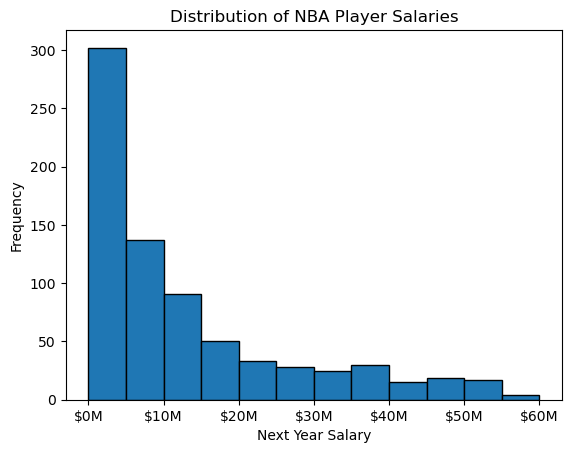

In [4]:
bins = np.arange(0, df['Next_Year_Salary'].max()+5000000, 5000000)

plt.hist(df['Next_Year_Salary'], bins = bins, edgecolor = 'black')
ax = plt.gca()

ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)

plt.xlabel('Next Year Salary')
plt.ylabel('Frequency')
plt.title('Distribution of NBA Player Salaries')

The distribution of NBA salaries is clearly right skewed. Most players earn below 5 million dollars. This makes sense, because there are very few "superstars" who are deserving of a salary above 30 million, and majority of NBA players are role players or depth pieces that aren't expected to make much relative to others in their careers. 

### Salary and Stats

Text(0.5, 1.0, 'Box Plus Minus Vs. Salary')

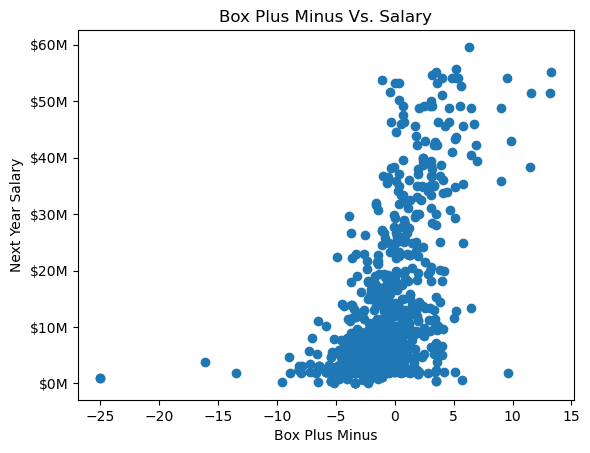

In [5]:
plt.scatter(df['BPM'], df['Next_Year_Salary'])
ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)
plt.xlabel("Box Plus Minus")
plt.ylabel("Next Year Salary")
plt.title("Box Plus Minus Vs. Salary")

Box plus minus is a popular basketball advanced statistic that estimates a player's contribution to the team's performance, both offensively and defensively. A higher box plus minus score means that a player is contributing more towards their team's  success. It seems like there is a general positive trend in that players with higher BPM scores can expect to see higher salaries. However, there are a couple outliers, so we'll subset the dataset to only include players with BPM scores higher than -10 and replot this relationship. 

Text(0.5, 1.0, 'Box Plus Minus Vs. Salary')

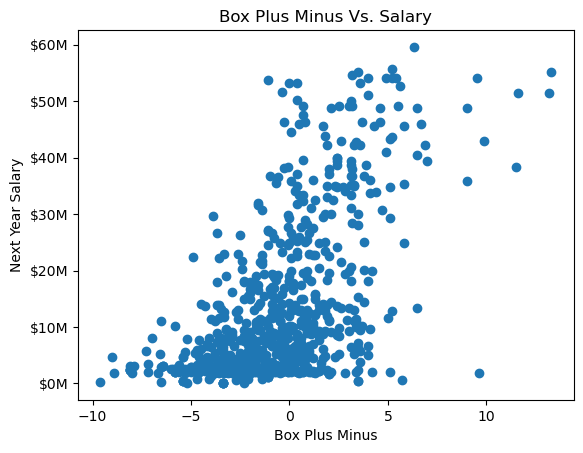

In [6]:
subset = df[df['BPM'] > -10]

plt.scatter(subset['BPM'], subset['Next_Year_Salary'])
ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)
plt.xlabel("Box Plus Minus")
plt.ylabel("Next Year Salary")
plt.title("Box Plus Minus Vs. Salary")

In [7]:
print(f"Correlation coefficient: {df['BPM'].corr(df['Next_Year_Salary'])}")

print(f"Subsetted Correlation coefficient: {subset['BPM'].corr(subset['Next_Year_Salary'])}")


Correlation coefficient: 0.5565013579110638
Subsetted Correlation coefficient: 0.5871708693441092


After removing the outliers, the scatterplot gives a better view of the relationship between BPM and NBA salaries. The correlation coefficient confirms that there is a moderately strong positive association between the two.  

Let's do the same with VORP now

Text(0.5, 1.0, 'VORP Vs. Salary')

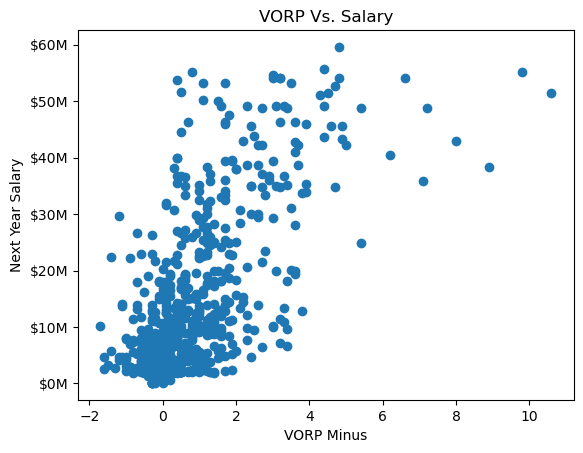

In [8]:
plt.scatter(df['VORP'], df['Next_Year_Salary'])
ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)
plt.xlabel("VORP Minus")
plt.ylabel("Next Year Salary")
plt.title("VORP Vs. Salary")

In [9]:
print(f"Correlation coefficient: {df['VORP'].corr(df['Next_Year_Salary'])}")


Correlation coefficient: 0.6744527184663939


VORP is another popular advanced stat that estimates a player's overall contribution to a team compared to an average NBA player. It shows the same positive association with NBA salaries as BPM did; however, the correlation coefficient does show a stronger linear relationship than with BPM.

Let's take a look at how offensive and defensive metrics relate to NBA salaries

/tmp/ipykernel_2593/2651727041.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([good_scoring['Next_Year_Salary'], bad_scoring['Next_Year_Salary']], labels = ['Prolific Scorers', 'Non Prolific Scorers'])


Text(0.5, 1.0, 'Salary Comparison Between Prolific Scoring Players and Non Prolific Scoring Players')

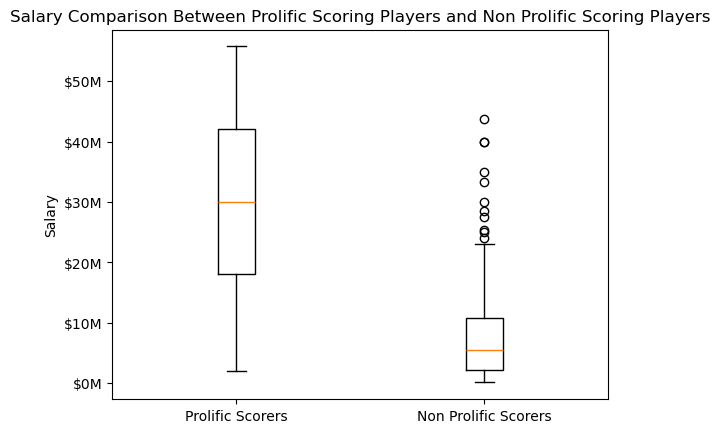

In [10]:
good_scoring = df[(df['FGA'] >= 10) & (df['FG%'] >= 0.45)]
bad_scoring = df[~(df['FGA'] >= 10) & (df['FG%'] >= 0.45)]

plt.boxplot([good_scoring['Next_Year_Salary'], bad_scoring['Next_Year_Salary']], labels = ['Prolific Scorers', 'Non Prolific Scorers'])

ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)

plt.ylabel('Salary')
plt.title('Salary Comparison Between Prolific Scoring Players and Non Prolific Scoring Players')

This plot shows that there is quite a big difference in salaries between efficient scorers in the league and those who aren't. Moreover, the boxplot for prolific scorers is about normally distributed, while the boxplot for nonprolific scorers is definitely right skewed. This shows that most players who aren't efficiently scoring for their teams earn significantly less than those that do. This is probably a big factor that goes into determining a player's salary, which makes sense, as basketball is primarily an offensively minded sport. 

Text(0.5, 1.0, 'Defensive Box Plus Minus Vs. Salary')

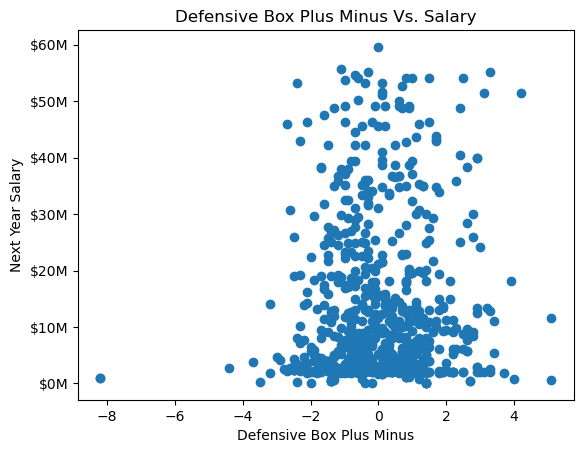

In [11]:
plt.scatter(df['DBPM'], df['Next_Year_Salary'])
ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)
plt.xlabel("Defensive Box Plus Minus")
plt.ylabel("Next Year Salary")
plt.title("Defensive Box Plus Minus Vs. Salary")

In [12]:
print(f"Correlation coefficient: {df['DBPM'].corr(df['Next_Year_Salary'])}")


Correlation coefficient: 0.05995507005883653


It's difficult to group players into defensively good and bad categories using defensive stats, as they aren't as accurate as offensive stats in evaluating a player's effectiveness. Instead, we used defensive box plus minus, which is essentially the same as box plus minus, but it evaluates a player's defensive efficiency/potential. The scatterplot and correlation coefficient both show that there isn't much of a relationship between defensive BPM and salaries. 

The last two plots show that offensive potential is more valued than defensive potential in evaluating a player's worth to a team through their salary. There is a clear salary difference between good offensive players and more average players, while there is not much of a relationship between defensive stats and NBA salaries. 

Text(0.5, 1.0, 'DBPM Vs. BPM')

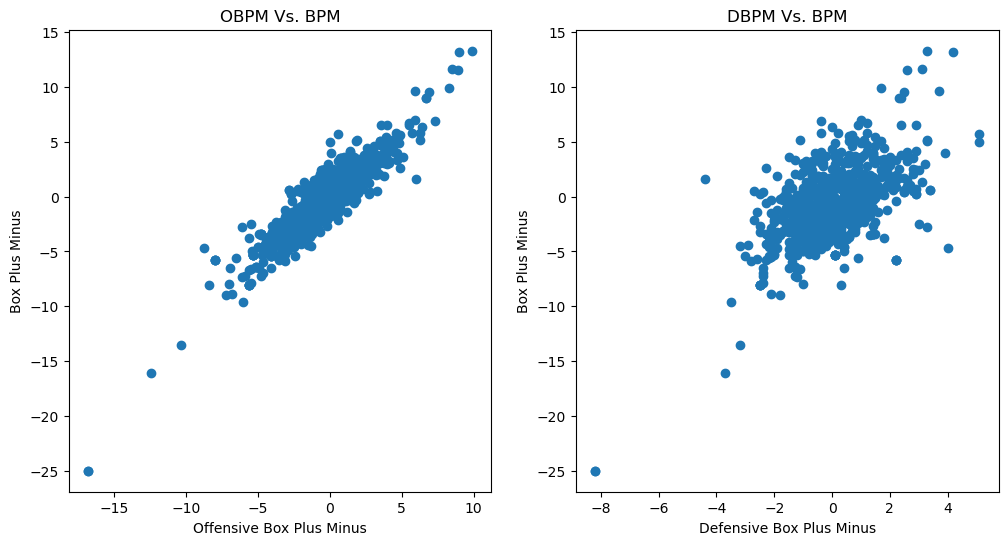

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

axs[0].scatter(df['OBPM'], df['BPM'])
axs[1].scatter(df['DBPM'], df['BPM'])

axs[0].set_xlabel("Offensive Box Plus Minus")
axs[0].set_ylabel("Box Plus Minus")

axs[1].set_xlabel("Defensive Box Plus Minus")
axs[1].set_ylabel("Box Plus Minus")

axs[0].set_title("OBPM Vs. BPM")
axs[1].set_title("DBPM Vs. BPM")

Overall BPM is the sum of Offensive BPM and Defensive BPM. Our earlier analysis shows that there is a higher correlation between offensive stats and salaries than for defensive stats. We also showed a general positive association between BPM and salaries. Out of curiosity, I wanted to see the relationship between OBPM/DBPM and general BPM. There is clearly a stronger positive relationship between OBPM and BPM than for DBPM, which aligns with our earlier analysis between stats and salaries. 

From a salary standpoint, it seems like an offensive superstar is worth more than a defensive superstar. 

### Salary In Relation to Experience and Awards 

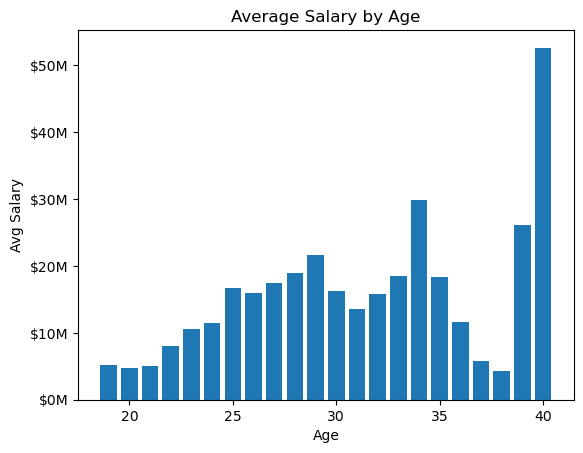

In [14]:
age_salary = df.groupby('Age')['Next_Year_Salary'].mean()

ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)

plt.bar(age_salary.index, age_salary.values)
plt.xlabel("Age")
plt.ylabel("Avg Salary")
plt.title("Average Salary by Age")
plt.show()

In [15]:
df[df['Age'] == 40]

,Rk_x,Player,Age,Team,Pos,G,GS,MP_x,FG,FGA,...,SecondTeam,ThirdTeam,DefTeam1,DefTeam2,Salary,Guaranteed,2023-24_contract_year,Next_Year_Salary,Next_Year_Guaranteed,2024-25_contract_year
201,19.0,LeBron James,40.0,LAL,SF,70.0,70.0,34.9,9.3,18.1,...,1,0,0,0,48728845,48728845,NaN,52627153,52627153,0.0


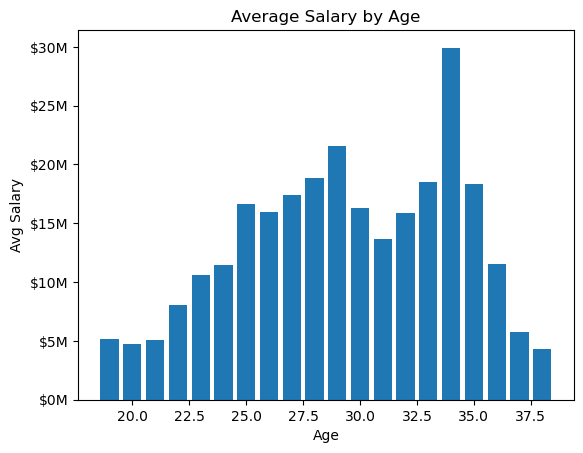

In [16]:
subset = df[df['Age'] < 39]
age_salary = subset.groupby('Age')['Next_Year_Salary'].mean()

ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)

plt.bar(age_salary.index, age_salary.values)
plt.xlabel("Age")
plt.ylabel("Avg Salary")
plt.title("Average Salary by Age")
plt.show()

The 40 years old column stands out, but after inspecting the dataframe, it makes sense, as there is only one 40 year old player, which is Lebron James. Arguably the greatest player of all time, he has a salary of about $48 million. Other than that though, the graph looks to be bimodal, with peaks around 29 years and 34 years. This makes sense, as players in their late 20s are typically around their peaks, which would coincide with higher salaries. The second peak is around older players, but the only players to remain in the leage in that age range are typically older superstars whose careers are defined by longevity. It then falls off, as very old players in their late 30s aren't as efficient as they used to be, which coincides with smaller salaries. 

Text(0.5, 1.0, 'Average Salary By Number of Awards')

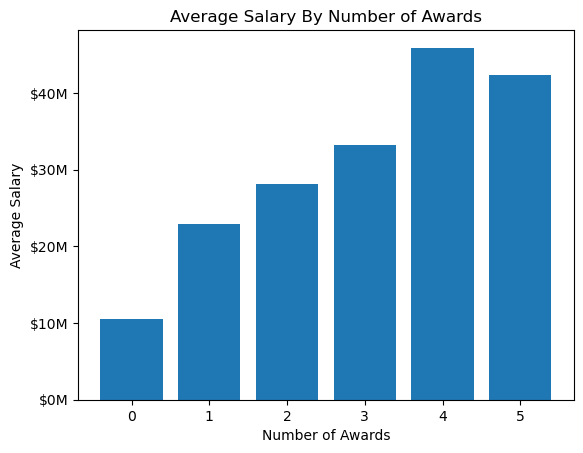

In [17]:
awards_salary = df.groupby('NumOfAwards')['Next_Year_Salary'].mean()

plt.bar(awards_salary.index, awards_salary.values)

ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)

plt.xlabel('Number of Awards')
plt.ylabel("Average Salary")

plt.title("Average Salary By Number of Awards")

/tmp/ipykernel_2593/3627832629.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_star['Next_Year_Salary'], non_all_star['Next_Year_Salary']], labels = ["All Star", "Non All Star"])


Text(0.5, 1.0, 'NBA Salary By All Star Selection')

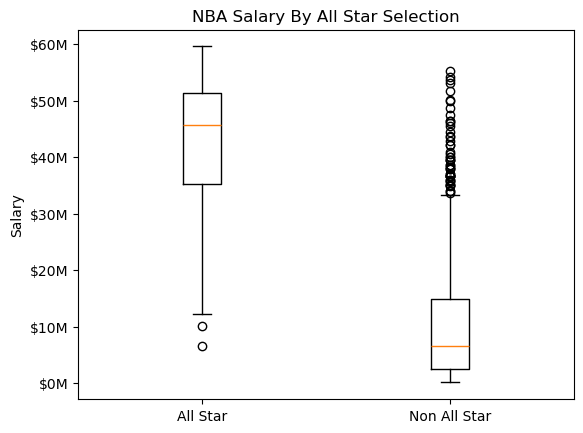

In [18]:
all_star = df[df['All-Star'] == 1]
non_all_star = df[df['All-Star'] == 0]

plt.boxplot([all_star['Next_Year_Salary'], non_all_star['Next_Year_Salary']], labels = ["All Star", "Non All Star"])
ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)

plt.ylabel("Salary")
plt.title("NBA Salary By All Star Selection")

There are many awards in the NBA most notably: Most Valuable Player (MVP), Defensive Player of the Year (DPOY), and All NBA team selections. As expected, players with more awards tend to have higher salaries, as those with more awards are naturally better players. Another important accolade is selection for the All Star team. The side by side boxplot shows that All Star Players do earn much more than those who aren't. However, there are a lot of non All Star players as outliers who make about the same as All Star players. This is because All Star nominations are extremely selective, as there is only a certain amount of players each year who can be selected. As a result, there are many extremely talented players who are left off of the All Star roster. 

### Salary By Position

Text(0.5, 1.0, 'Average Salary By Position')

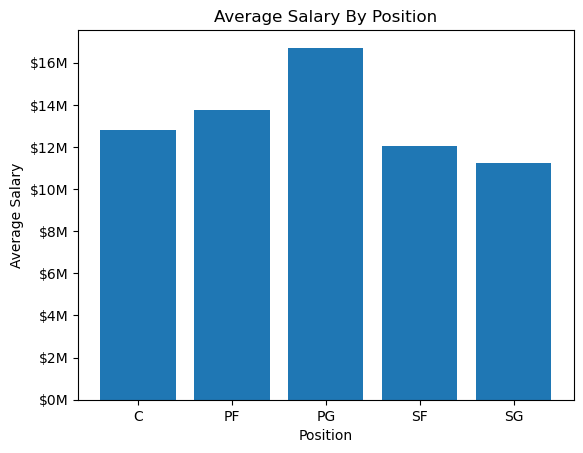

In [19]:
position_salary = df.groupby('Pos')['Next_Year_Salary'].mean()

plt.bar(position_salary.index, position_salary.values)

ax = plt.gca()

ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x/1e6:.0f}M")
)

plt.xlabel("Position")
plt.ylabel("Average Salary")

plt.title("Average Salary By Position")

It seems like point guards on average are paid more than their peers. This makes sense, because usually the point guards are the players managing a team's offense. Oftentimes, team offenses are largely structured around the play of their pointguards. Due to their importance to teams, it does make sense that they are paid more on average than other positions. All other positions are on average paid around the same at around $12 million. 

In [20]:
vif_columns = ['Age', 'G', 'GS', 'MP_x', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Experience', 'NumOfAwards',
       'All-Star', 'AwardWinner', 'FirstTeam', 'SecondTeam', 'ThirdTeam',
       'DefTeam1', 'DefTeam2']

non_numeric = ['Player', 'Team', 'Pos', 'Awards']

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

df_vif = df[vif_columns].copy()
df_vif = df_vif.fillna(df_vif.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_vif)

vif_df = pd.DataFrame()
vif_df['feature'] = df_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) 
                 for i in range(X_scaled.shape[1])]


In [22]:
vif_df.sort_values('VIF', ascending = False)

,feature,VIF
5,FGA,11334.313903
25,PTS,9779.616399
4,FG,6141.997694
11,2PA,5951.906296
44,BPM,5458.378063
42,OBPM,3796.309527
40,WS,3573.113550
19,TRB,2569.834462
8,3PA,2564.941947
10,2P,2022.208142


A lot of the variables in our dataset are highly correlated, as they are functions of each other. For instance FG% = FG/FGA. Let's drop all of the counting stats and keep percentage based stats. We'll also drop most of the advanced stats but keep BPM, as most advanced stats are factored into BPM. 

In [23]:
cols2drop = ['G', 'GS', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', '3PAr', 'FTr', 'STL', 'AST', 'BLK', 'TOV', 'OWS', 'DWS', 'WS', 'OBPM', 'DBPM', 'VORP', 'Experience', 'FG%', '3P%', '2P%', 'ORB%', 'DRB%', 'eFG%', 'WS/48', 'PER', 'PTS']

df_vif.drop(cols2drop, axis=1, inplace=True)

df_vif.columns

Index(['Age', 'MP_x', 'FT%', 'PF', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'BPM', 'NumOfAwards', 'All-Star', 'AwardWinner',
       'FirstTeam', 'SecondTeam', 'ThirdTeam', 'DefTeam1', 'DefTeam2'],
      dtype='object')

In [24]:
df_vif = df_vif.fillna(df_vif.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_vif)

vif_df = pd.DataFrame()
vif_df['feature'] = df_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) 
                 for i in range(X_scaled.shape[1])]


In [25]:
vif_df.sort_values('VIF', ascending = False)

,feature,VIF
12,NumOfAwards,9.176457
11,BPM,9.127890
6,AST%,4.104217
1,MP_x,3.605552
4,TS%,3.477893
15,FirstTeam,3.128460
13,All-Star,3.073826
9,TOV%,2.709212
3,PF,2.581566
5,TRB%,2.507663


Much better, we can keep all of these columns, as the VIF values are all less than 10. 

In [26]:
cols2keep = list(vif_df.feature)

In [27]:
cols2keep

['Age',
 'MP_x',
 'FT%',
 'PF',
 'TS%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'BPM',
 'NumOfAwards',
 'All-Star',
 'AwardWinner',
 'FirstTeam',
 'SecondTeam',
 'ThirdTeam',
 'DefTeam1',
 'DefTeam2']

In [28]:
final_df = df[cols2keep+['Pos', 'Next_Year_Salary']]

final_df.columns

Index(['Age', 'MP_x', 'FT%', 'PF', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'BPM', 'NumOfAwards', 'All-Star', 'AwardWinner',
       'FirstTeam', 'SecondTeam', 'ThirdTeam', 'DefTeam1', 'DefTeam2', 'Pos',
       'Next_Year_Salary'],
      dtype='object')